In [ ]:
%matplotlib inline
import os
import cv2
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd'/content/drive/My Drive/License plate'

/content/drive/My Drive/License plate


In [ ]:
X = []
Y = []
list_link = os.listdir(r'vydata/')
print(list_link)


['84', '71', '70', '78', '85', '82', '48', '49', '76', '77', '86', '55', '65', '52', '75', '80', '53', '83', '54', '72', '50', '56', '57', '67', '69', '51', '68', '66', '90', '89', '88']


In [ ]:
for i in list_link:
    link = r'vydata/{}'.format(i)
    link_img = os.listdir(link)
    for j in link_img:
        img = cv2.imread(r'vydata/{}/{}'.format(i,j), 0)
        img = cv2.resize(img,(30,60))
        img = img.reshape(1, -1)
        X.append(img[0].tolist())
        Y.append(int(i))
        

In [ ]:
X = np.array(X,dtype=np.float32)
Y = np.array(Y)

Lay data dùng để test và data dùng để train

In [ ]:
sss = StratifiedShuffleSplit(n_splits=2, test_size=0.2)
for train_index, test_index in sss.split(X, Y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]

y_train = y_train.reshape(-1, 1)
print(y_train)

[[53]
 [80]
 [53]
 [86]
 [49]
 [75]
 [50]
 [49]
 [50]
 [56]
 [51]
 [49]
 [54]
 [49]
 [55]
 [54]
 [55]
 [52]
 [90]
 [53]
 [76]
 [90]
 [53]
 [70]
 [52]
 [50]
 [55]
 [53]
 [72]
 [56]
 [84]
 [49]
 [69]
 [49]
 [85]
 [51]
 [49]
 [82]
 [55]
 [51]
 [55]
 [55]
 [51]
 [52]
 [71]
 [55]
 [57]
 [55]
 [83]
 [56]
 [78]
 [49]
 [78]
 [55]
 [57]
 [52]
 [53]
 [56]
 [71]
 [90]
 [55]
 [88]
 [68]
 [54]
 [88]
 [54]
 [51]
 [57]
 [57]
 [84]
 [72]
 [54]
 [50]
 [51]
 [50]
 [48]
 [53]
 [53]
 [75]
 [54]
 [56]
 [49]
 [90]
 [48]
 [90]
 [75]
 [51]
 [54]
 [53]
 [52]
 [67]
 [51]
 [56]
 [55]
 [71]
 [71]
 [56]
 [84]
 [70]
 [72]
 [80]
 [56]
 [50]
 [49]
 [49]
 [48]
 [53]
 [49]
 [86]
 [89]
 [85]
 [51]
 [55]
 [52]
 [51]
 [51]
 [52]
 [57]
 [51]
 [51]
 [55]
 [84]
 [72]
 [70]
 [69]
 [49]
 [55]
 [67]
 [52]
 [48]
 [48]
 [54]
 [57]
 [50]
 [51]
 [55]
 [57]
 [52]
 [51]
 [89]
 [48]
 [50]
 [49]
 [51]
 [66]
 [86]
 [89]
 [72]
 [52]
 [51]
 [56]
 [54]
 [49]
 [57]
 [80]
 [77]
 [56]
 [54]
 [52]
 [65]
 [54]
 [51]
 [89]
 [54]
 [82]
 [56]
 [48

Opencv2
- C-Support Vector Classification. n-class classification (n >= 2)
- 

In [ ]:
svm_model = cv2.ml.SVM_create()
svm_model.setType(cv2.ml.SVM_C_SVC)
svm_model.setKernel(cv2.ml.SVM_INTER)
svm_model.setTermCriteria((cv2.TERM_CRITERIA_MAX_ITER, 1000, 1e-10))
#opencv chi support tham so row_sample
svm_model.train(X_train, cv2.ml.ROW_SAMPLE, y_train)
svm_model.save("model_svm2.xml")

In [ ]:
a = svm_model.predict(X_test)
y_predicted = []
for i in a[1]:
    y_predicted.append(i[0])
y_predicted = np.array(y_predicted)


In [ ]:
target = [chr(x) for x in y_predicted]
target = list(set(target))
target.sort()
#Su chinh xac
print('accuracy  = ',accuracy_score(y_test,y_predicted))
#Do chinh xac
print('precision = ', precision_score(y_test,y_predicted,average= 'weighted'))
print('recall    = ', recall_score(y_test,y_predicted,average= 'weighted'))
print("f1        =", f1_score(y_test,y_predicted, average= 'weighted'))
print(classification_report(y_test, y_predicted, target_names=target))

accuracy  =  0.9942528735632183
precision =  0.9954022988505746
recall    =  0.9942528735632183
f1        = 0.9936143039591315
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00        11
           3       1.00      1.00      1.00        16
           4       1.00      1.00      1.00        14
           5       1.00      1.00      1.00        12
           6       1.00      1.00      1.00        10
           7       1.00      1.00      1.00        14
           8       1.00      1.00      1.00        11
           9       1.00      1.00      1.00        10
           A       1.00      1.00      1.00         2
           B       1.00      1.00      1.00         3
           C       1.00      1.00      1.00         3
           D       1.00      1.00      1.00         3
           E       1.00      1.00      1.00         3
        

Text(159.0, 0.5, 'Truth')

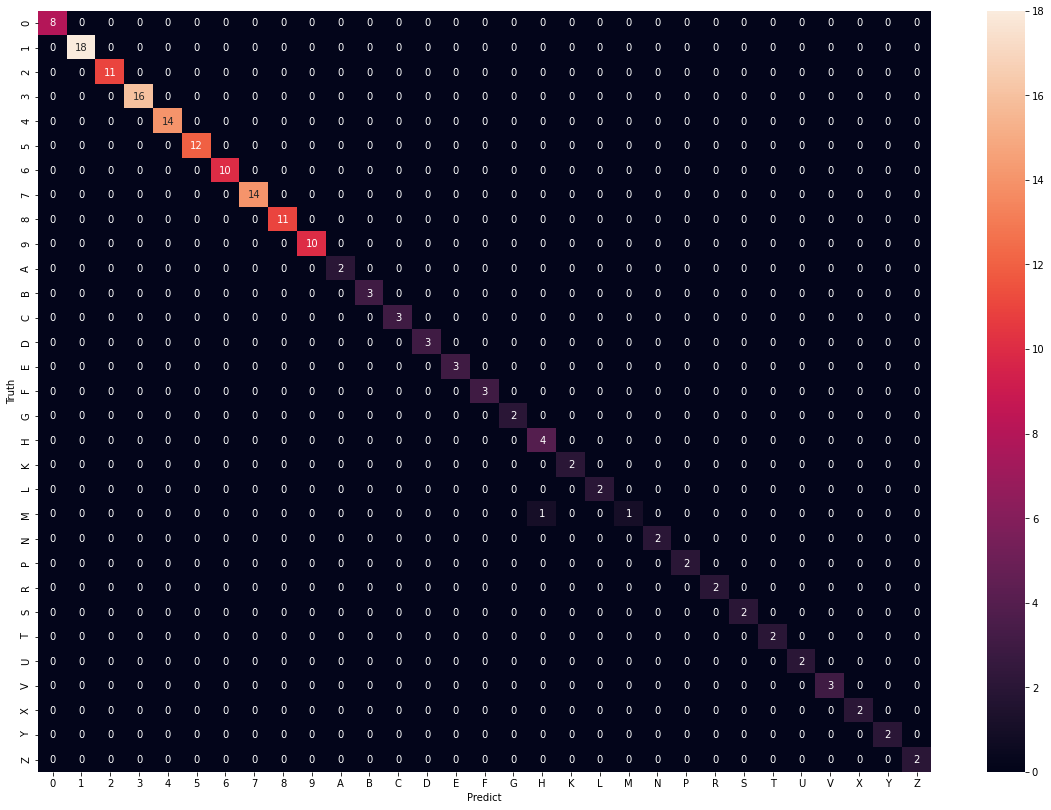

In [ ]:
cm = confusion_matrix(y_test, y_predicted)
cm = pd.DataFrame(data = cm[0:,0:], index = target, columns = target)
plt.figure(figsize = (20,14))
sn.heatmap(cm, annot=True)
plt.xlabel("Predict")
plt.ylabel("Truth")
